### NIGERIAN PRESIDENTIAL ELECTION 2023 EXPLORATION

### Import modules required

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import re 

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# ML Algorithms and Natural Language Processing

import nltk
import sklearn

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [2]:
tweets_naija = pd.read_csv("nigerian_presidential_election_2023_tweets.csv")

/var/folders/dx/q5s8q5z94qjggh9xlzf_rlch0000gn/T/ipykernel_5277/2206567574.py:1: DtypeWarning: Columns (0,5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_naija = pd.read_csv("nigerian_presidential_election_2023_tweets.csv")


### Data Cleaning 

In [3]:
# change text to lower case
tweets_naija['text'] = tweets_naija['text'].str.lower()

# remove URLS from text
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

# remove special characters slash username tags
def remove_special_characters(text):
    return re.sub('@[^\s]+','',text)


# apply removal
def clean_text(row):
    text = row['text']
    hashtags = row['hashtags']
    if isinstance(text, str):
        text = remove_special_characters(text)
        text = remove_urls(text)
        text = text.replace('#', '')
    return text

# apply clean to text 
tweets_naija['text'] = tweets_naija.apply(clean_text, axis=1)

In [4]:
# Further preprocessing: stop words removal
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kayodeoke/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/kayodeoke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kayodeoke/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kayodeoke/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
def remove_stop_words(text):
    # Further preprocessing: tokenize 
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(words)

    return cleaned_text

#REMOVE ROWS WITH NAN VALUES IN TEXT COLUMN
tweets_naija.dropna(subset=['text'], inplace=True)

# Apply tokenization and stop words removal to the 'text' column
tweets_naija['text'] = tweets_naija['text'].apply(remove_stop_words)

### Sentiment Analysis 

In [6]:
mood = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if mood.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif mood.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"
    
tweets_naija['mood'] = tweets_naija['text'].apply(find_sentiment)

### CAPTIVATING THE GENERAL MOOD OF THE NIGERIAN PRESIDENTIAL ELECTION 2023

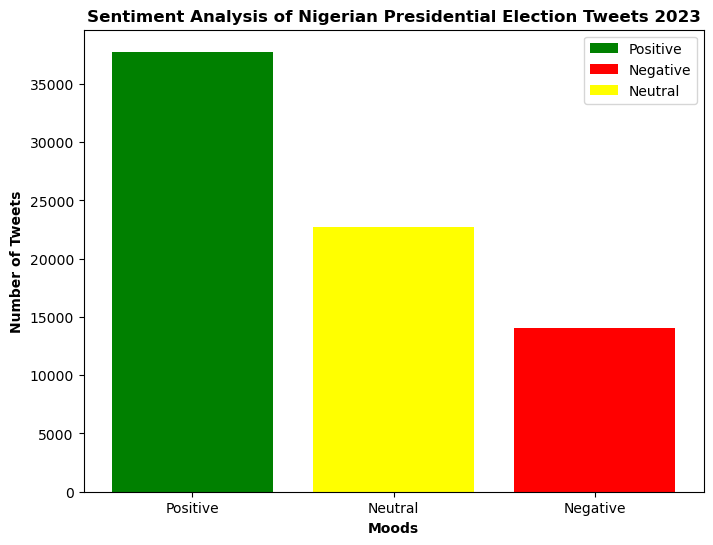

In [7]:
sentiment_counts = tweets_naija['mood'].value_counts()

# Define colors for each sentiment category
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow'}

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[mood] for mood in sentiment_counts.index])

plt.xlabel('Moods', fontweight='bold')
plt.ylabel('Number of Tweets', fontweight='bold')
plt.title('Sentiment Analysis of Nigerian Presidential Election Tweets 2023', fontweight='bold')

# Add color labels to the legend
for mood, color in colors.items():
    plt.bar(0, 0, color=color, label=mood)

plt.legend()
plt.show()

### CAPTIVATING THE WORD CLOUDS OF THE GENERAL MOOD OF THE NIGERIAN PRESIDENTIAL ELECTION 2023

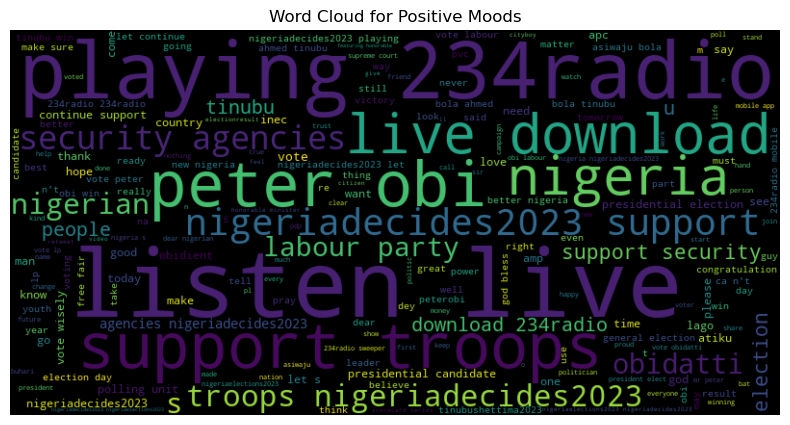

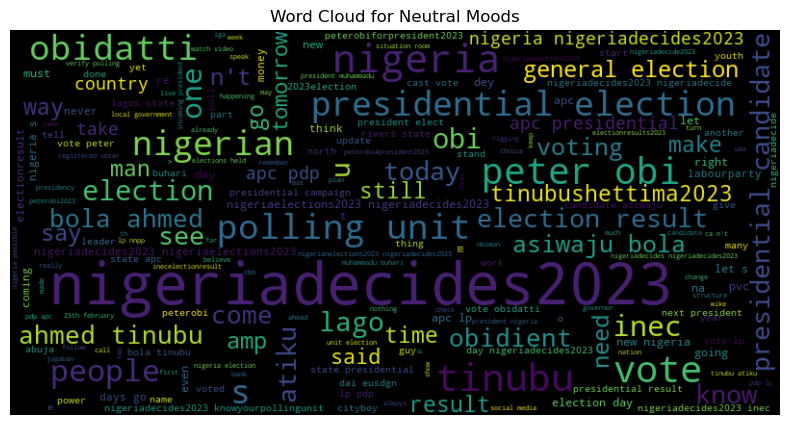

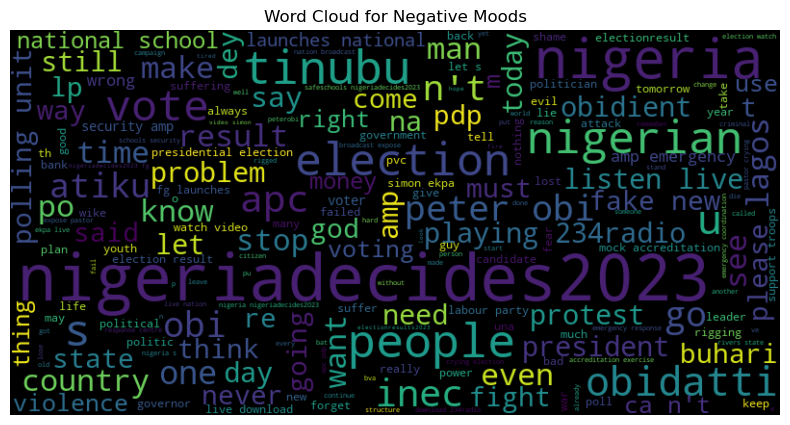

In [8]:
positive_tweets = tweets_naija[tweets_naija['mood'] == 'Positive']['text'].values
negative_tweets = tweets_naija[tweets_naija['mood'] == 'Negative']['text'].values
neutral_tweets = tweets_naija[tweets_naija['mood'] == 'Neutral']['text'].values

# Function to generate word clouds
def generate_word_cloud(tweets, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis', random_state=42).generate(' '.join(tweets))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Generate word clouds for each sentiment category
generate_word_cloud(positive_tweets, "Word Cloud for Positive Moods")
generate_word_cloud(neutral_tweets, "Word Cloud for Neutral Moods")
generate_word_cloud(negative_tweets, "Word Cloud for Negative Moods")

  ### CAPTIVATING THE MOOD TO EACH PARTICULAR NIGERIAN PRESIDENTIAL CANDIDATE 2023

In [9]:
# Function to check if either first name or last name is present in the tweet
def contains_candidate_name(tweet_text, candidate_name):
    candidate_parts = candidate_name.split(" ")
    return any(part.lower() in tweet_text.lower() for part in candidate_parts)

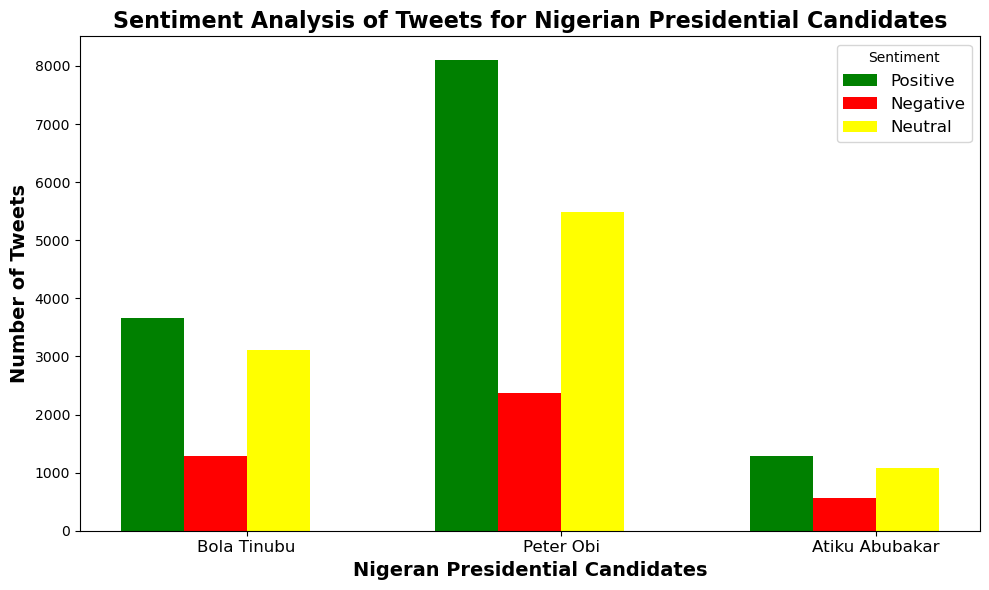

<Figure size 640x480 with 0 Axes>

In [10]:
def generate_sentiment_chart(tweets):
    candidates = ["Bola Tinubu", "Peter Obi", "Atiku Abubakar"]
    sentiments = ["Positive", "Negative", "Neutral"]
    colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'yellow'}

    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.2
    x = range(len(candidates))

    for i, sentiment in enumerate(sentiments):
        sentiment_counts = []

        for candidate in candidates:
            candidate_tweets = tweets[tweets['text'].apply(lambda x: contains_candidate_name(x, candidate))]
            sentiment_counts.append(len(candidate_tweets[candidate_tweets['mood'] == sentiment]))

        ax.bar([pos + i * width for pos in x], sentiment_counts, width=width, label=sentiment, color=colors[sentiment])

    
    ax.set_xlabel('Nigeran Presidential Candidates', fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Tweets', fontsize=14, fontweight='bold')
    ax.set_title('Sentiment Analysis of Tweets for Nigerian Presidential Candidates', fontsize=16, fontweight='bold')
    ax.set_xticks([pos + 1.5 * width for pos in x])
    ax.set_xticklabels(candidates, fontsize=12)
    ax.legend(title='Sentiment', loc='upper right', fontsize=12)

    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()

# Generate grouped bar chart for sentiment distribution of all three candidates
generate_sentiment_chart(tweets_naija)

In [11]:
mood_for_candidates = SentimentIntensityAnalyzer()
def find_sentiment_candidate(post):
    try:
        return mood_for_candidates.polarity_scores(post)["compound"]
    except:
        return 0.0 

In [12]:
# Apply sentiment analysis to the 'text' column

tweets_naija['sentiment_score'] = tweets_naija['text'].apply(find_sentiment_candidate)
def generate_average_sentiment_scores(tweets):
    candidates = ["Bola Tinubu", "Peter Obi", "Atiku Abubakar"]
    
    sentiment_scores = []
    
    for candidate in candidates:
        candidate_tweets = tweets[tweets['text'].apply(lambda x: contains_candidate_name(x, candidate))]
        candidate_average_sentiment_score = candidate_tweets['sentiment_score'].mean()
        sentiment_scores.append(candidate_average_sentiment_score)

    # Create a DataFrame from the average sentiment scores
    sentiment_df = pd.DataFrame(sentiment_scores, index=candidates, columns=["Average Sentiment Score"])
    
    return sentiment_df

# Generate average sentiment scores for each candidate
average_sentiment_df = generate_average_sentiment_scores(tweets_naija)

print(average_sentiment_df)

                Average Sentiment Score
Bola Tinubu                    0.159313
Peter Obi                      0.190572
Atiku Abubakar                 0.139682


### RETRIEVING THE MOST HASHTAGGED CANDIDATE:  GAUGING POPULARITY OF NIGERIAN PRESIDENTIAL CANDIDATE

In [13]:
# Function to count the occurrences of candidate names in hashtags
def count_candidate_mentions(hashtags, candidates):
    hashtag_counts = {candidate: 0 for candidate in candidates}
    hashtags_str = str(hashtags)  # Convert the floating-point numbers to a string
    for candidate in candidates:
        candidate_parts = candidate.split(" ")
        for hashtag in hashtags_str.split():
            if any(part.lower() in hashtag.lower() for part in candidate_parts):
                hashtag_counts[candidate] += 1
    return hashtag_counts


/var/folders/dx/q5s8q5z94qjggh9xlzf_rlch0000gn/T/ipykernel_5277/814189243.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(candidates, fontsize=12, fontweight='bold')


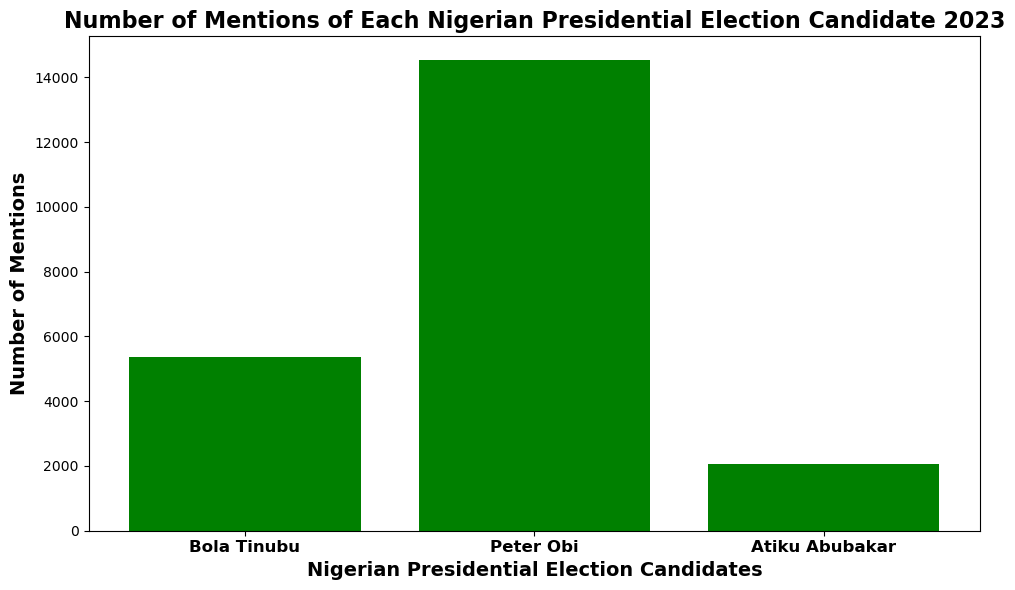

In [14]:
# Candidates list
candidates = ["Bola Tinubu", "Peter Obi", "Atiku Abubakar"]

# Apply the function to the 'hashtags' column to get the count of candidate mentions
tweets_naija['candidate_mentions'] = tweets_naija['hashtags'].apply(lambda x: count_candidate_mentions(x, candidates))

# Function to generate bar chart for candidate hashtag mentions
def generate_hashtag_mentions_chart(tweets, candidates):
    hashtag_counts = {candidate: 0 for candidate in candidates}
    for counts in tweets['candidate_mentions']:
        for candidate, count in counts.items():
            hashtag_counts[candidate] += count

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(hashtag_counts.keys(), hashtag_counts.values(), color='green')
    ax.set_xlabel('Nigerian Presidential Election Candidates', fontsize=14, fontweight='bold')
    ax.set_ylabel('Number of Mentions', fontsize=14, fontweight='bold')
    ax.set_title('Number of Mentions of Each Nigerian Presidential Election Candidate 2023', fontsize=16, fontweight='bold')
    ax.set_xticklabels(candidates, fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Generate bar chart for candidate hashtag mentions
generate_hashtag_mentions_chart(tweets_naija, candidates)


In [15]:
def calculate_total_mentions(tweets, candidates):
    hashtag_counts = {candidate: 0 for candidate in candidates}

    for counts in tweets['candidate_mentions']:
        for candidate, count in counts.items():
            hashtag_counts[candidate] += count

    return hashtag_counts

# Calculate the total number of mentions for each candidate
total_mentions = calculate_total_mentions(tweets_naija, candidates)


### NOTE: The number of mentions is signified about the multitude of times they were included in a hashtag, so higher signifies popularity amongst users on Twitter

### DEVISED SCALING POPULARITY = NUMBER OF MENTIONS X MEAN SENTIMENT SCORE 

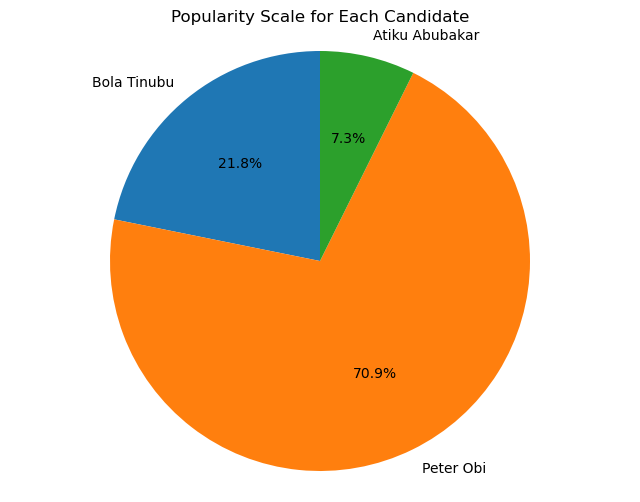

In [16]:
# Given average sentiment scores and mentions
average_scores = [0.159313, 0.190572, 0.139682]
mentions = [5358, 14543, 2051]

# Calculate popularity as the product of average sentiment scores and mentions
popularity = [i * j for i, j in zip(average_scores, mentions)]

# Create a DataFrame with the data
data = pd.DataFrame({
    'candidate': ["Bola Tinubu", "Peter Obi", "Atiku Abubakar"],
    'sentiment_score': average_scores,
    'number_of_mentions': mentions,
    'popularity_scale': popularity
})
popularity_data = data.set_index('candidate')['popularity_scale']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(popularity_data, labels=popularity_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Popularity Scale for Each Candidate')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show() 

In [17]:
# Displaying the predicted popularity_percentage for each candidate
data

,candidate,sentiment_score,number_of_mentions,popularity_scale
0,Bola Tinubu,0.159313,5358,853.599054
1,Peter Obi,0.190572,14543,2771.488596
2,Atiku Abubakar,0.139682,2051,286.487782


### Applying a Machine Learning Model to assess accuracy of featurs

In [18]:
# Feature Extraction: Use sentiment scores as features and sentiment labels as targets
X = tweets_naija['sentiment_score'].values.reshape(-1, 1)
y = tweets_naija['mood']

# Data Split: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training: Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [19]:
accuracy_table = pd.DataFrame({'Accuracy': [accuracy]})
print(accuracy_table)

print("\nClassification Report:")
classification_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print(classification_report_df)

print("\nConfusion Matrix:")
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred), index=model.classes_, columns=model.classes_)
print(confusion_matrix_df)

   Accuracy
0  0.981691

Classification Report:
              precision    recall  f1-score       support
Negative       1.000000  0.943227  0.970784   2783.000000
Neutral        0.942755  1.000000  0.970534   4496.000000
Positive       1.000000  0.984932  0.992409   7632.000000
accuracy       0.981691  0.981691  0.981691      0.981691
macro avg      0.980918  0.976053  0.977909  14911.000000
weighted avg   0.982739  0.981691  0.981777  14911.000000

Confusion Matrix:
          Negative  Neutral  Positive
Negative      2625      158         0
Neutral          0     4496         0
Positive         0      115      7517


### SENTIMENT CORRELATION WITH ELECTION RESULT 


In [20]:
naija_results = pd.read_csv("nigerian2023electionresults.csv")

In [21]:
naija_results.dropna(axis=1, how='all', inplace=True)

In [22]:
naija_results

,STATE,APC,PDP,LP
0,EKITI,"201,494","89,554","11,397"
1,KWARA,"263,572","136,909","31,166"
2,OSUN,"343,945","354,366","23,283"
3,ONDO,"369,924","115,463","44,405"
4,OGUN,"341,554","123,831",85.829
5,OYO,"449,884","182,977","99,110"
6,YOBE,"151,459","198,567","2,406"
7,ENUGU,"4,772","15,749","428,640"
8,LAGOS,"572,606","75,750","582,454"
9,GOMBE,"146,977","319,123","26, 160"


### I AM GOING TO SWAP THE NAMES OF THE PARTIES TO THE NAMES OF THE CANDIDATES FOR EASE 

In [23]:
column_rename_mapping = {
    'APC': 'Bola Tinubu',
    'PDP': 'Atiku Abubakar',
    'LP': 'Peter Obi'
}

naija_results.rename(columns=column_rename_mapping, inplace=True)

In [24]:
naija_results
naija_results = naija_results[:-1]

In [25]:
naija_results

,STATE,Bola Tinubu,Atiku Abubakar,Peter Obi
0,EKITI,"201,494","89,554","11,397"
1,KWARA,"263,572","136,909","31,166"
2,OSUN,"343,945","354,366","23,283"
3,ONDO,"369,924","115,463","44,405"
4,OGUN,"341,554","123,831",85.829
5,OYO,"449,884","182,977","99,110"
6,YOBE,"151,459","198,567","2,406"
7,ENUGU,"4,772","15,749","428,640"
8,LAGOS,"572,606","75,750","582,454"
9,GOMBE,"146,977","319,123","26, 160"


In [26]:
naija_results

,STATE,Bola Tinubu,Atiku Abubakar,Peter Obi
0,EKITI,"201,494","89,554","11,397"
1,KWARA,"263,572","136,909","31,166"
2,OSUN,"343,945","354,366","23,283"
3,ONDO,"369,924","115,463","44,405"
4,OGUN,"341,554","123,831",85.829
5,OYO,"449,884","182,977","99,110"
6,YOBE,"151,459","198,567","2,406"
7,ENUGU,"4,772","15,749","428,640"
8,LAGOS,"572,606","75,750","582,454"
9,GOMBE,"146,977","319,123","26, 160"


In [27]:
# Update the existing dataframe by removing commas, spaces, and dot, and converting to whole numbers
naija_results['Bola Tinubu'] = [int(str(val).replace(',', '').replace(' ', '').replace('.', '')) for val in naija_results['Bola Tinubu']]
naija_results['Atiku Abubakar'] = [int(str(val).replace(',', '').replace(' ', '').replace('.', '')) for val in naija_results['Atiku Abubakar']]
naija_results['Peter Obi'] = [int(str(val).replace(',', '').replace(' ', '').replace('.', '')) for val in naija_results['Peter Obi']]

/var/folders/dx/q5s8q5z94qjggh9xlzf_rlch0000gn/T/ipykernel_5277/267040786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naija_results['Bola Tinubu'] = [int(str(val).replace(',', '').replace(' ', '').replace('.', '')) for val in naija_results['Bola Tinubu']]
/var/folders/dx/q5s8q5z94qjggh9xlzf_rlch0000gn/T/ipykernel_5277/267040786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naija_results['Atiku Abubakar'] = [int(str(val).replace(',', '').replace(' ', '').replace('.', '')) for val in naija_resul

### K-CLUSTERING ON ANALYSISING VOTING PATTERNS OF STATES FOR NIGERIAN PRESIDENTIAL CANDIDATES

In [41]:
naija_results_clustering = naija_results.drop('STATE', axis=1)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(naija_results_clustering)

# Perform K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_data)

# Add the cluster labels to the DataFrame
naija_results['Cluster'] = kmeans.labels_

# Plot the clusters (assuming you have three candidates for this example)
colors = ['red', 'blue', 'green']
candidates = list(naija_results.columns[1:-1]) 


/Users/kayodeoke/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/dx/q5s8q5z94qjggh9xlzf_rlch0000gn/T/ipykernel_5277/1590084168.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naija_results['Cluster'] = kmeans.labels_


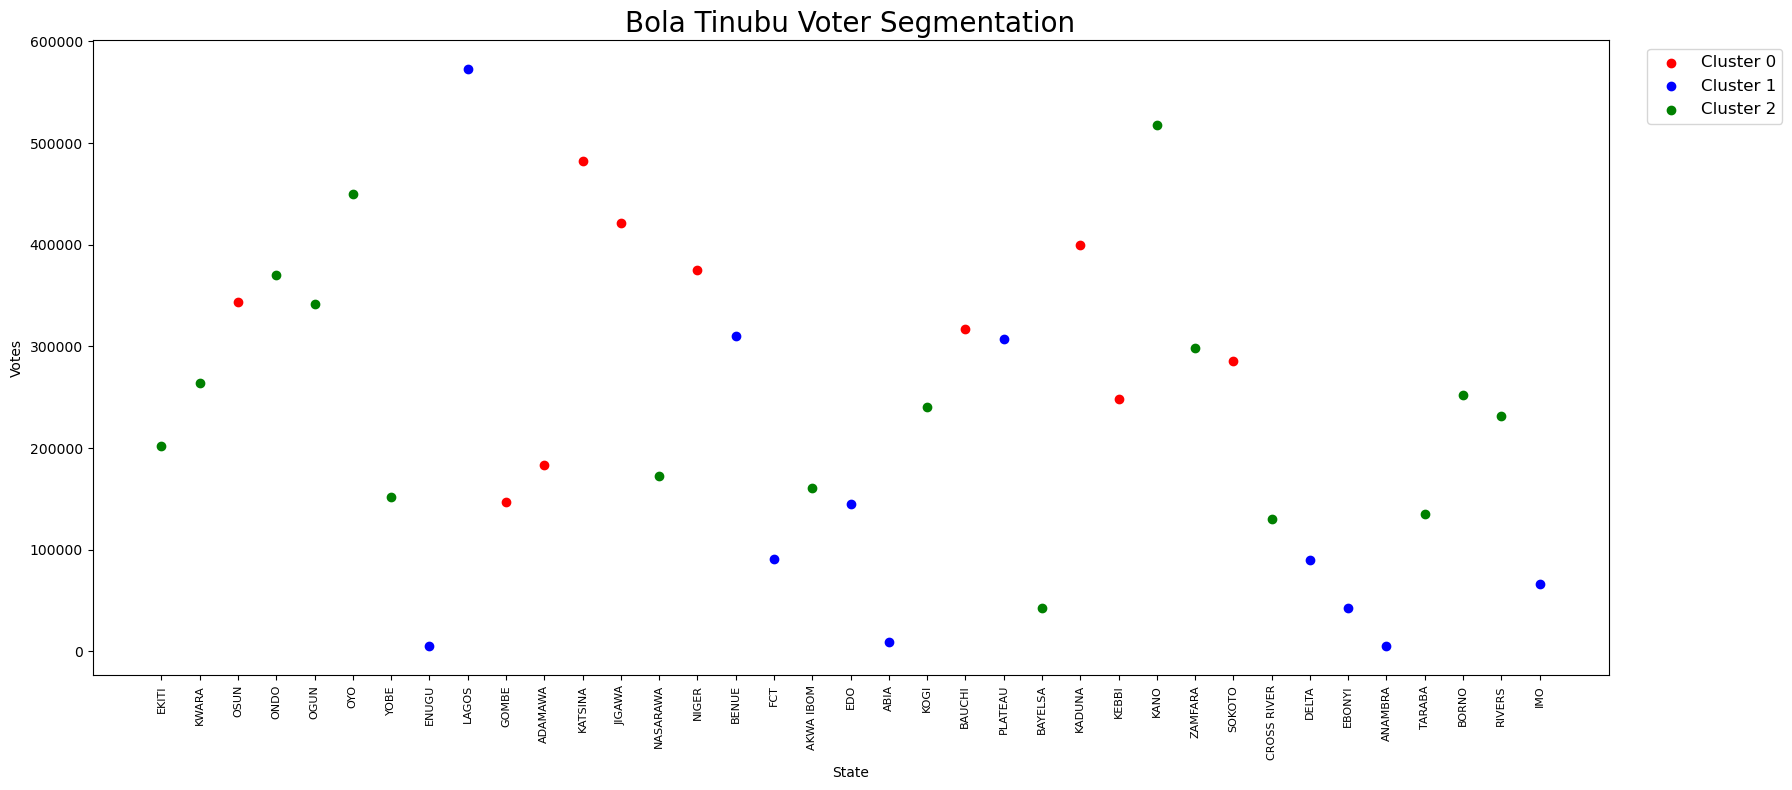

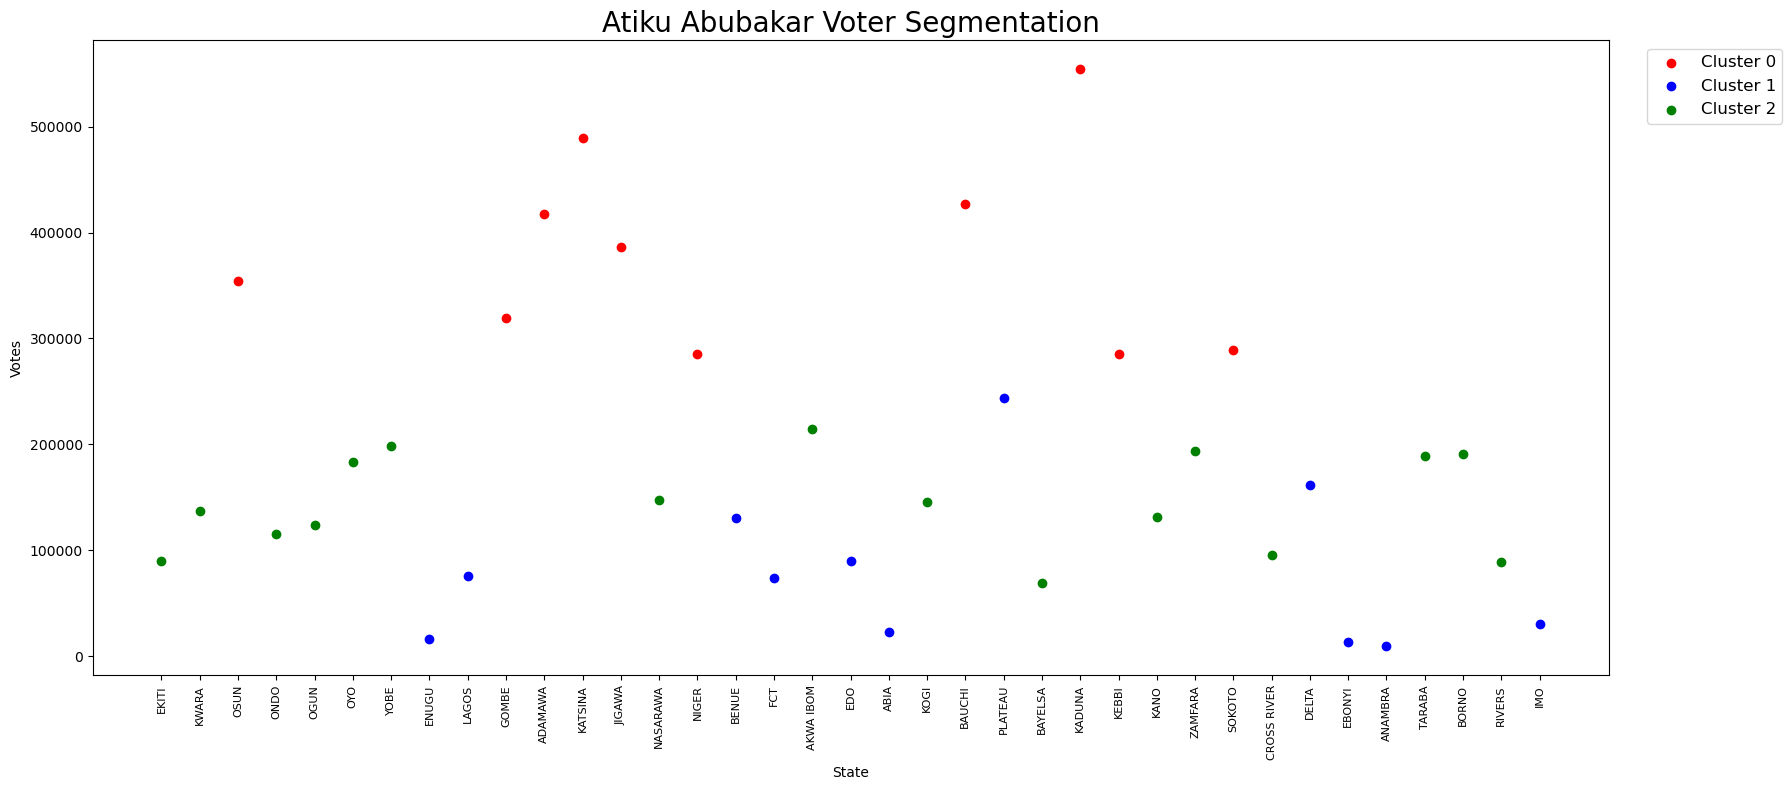

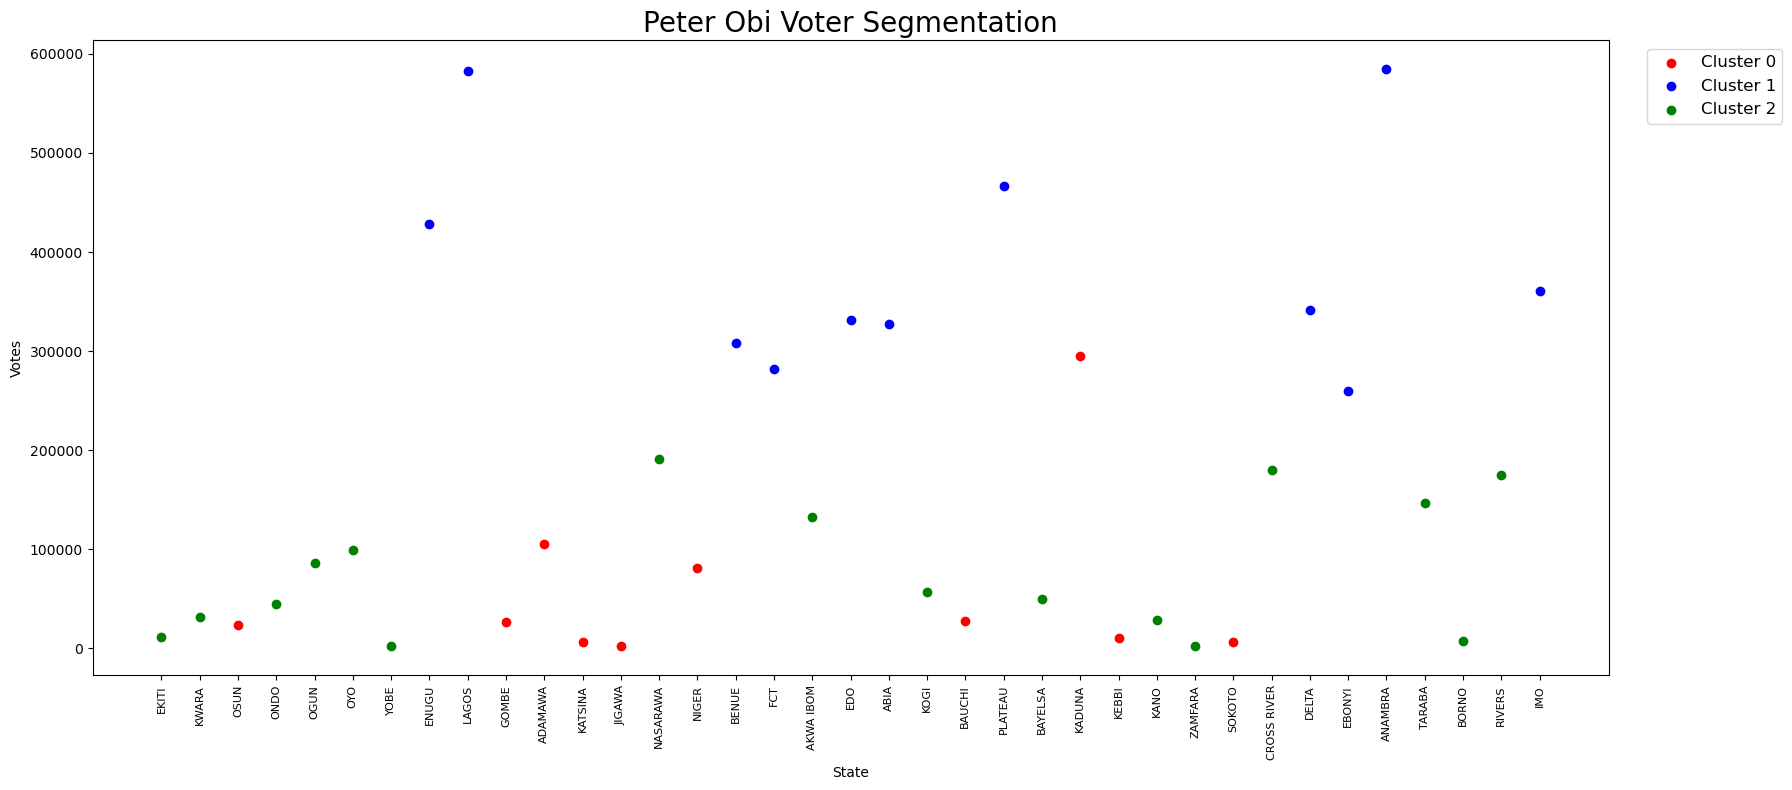

In [45]:
for j, candidate in enumerate(candidates):
    plt.figure(figsize=(18, 8))  # Increase the plot size here for better readability
    plt.title(f"{candidate} Voter Segmentation", fontsize=20)
    plt.xlabel('State')
    plt.ylabel('Votes')

    for i in range(num_clusters):
        cluster_data = naija_results[naija_results['Cluster'] == i].iloc[:, 1:-1]
        plt.scatter(cluster_data.index, cluster_data[candidate], color=colors[i], label=f'Cluster {i}')

    # Get the unique state names from the DataFrame
    state_names = naija_results['STATE'].unique()
    # Set x-axis tick positions and labels for every state
    plt.xticks(np.arange(len(state_names)), state_names, rotation=90, ha='center', fontsize=8)

    plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), fontsize="large")
    plt.tight_layout()  # Adjust spacing to fit all elements within the figure
    plt.show()

### NOTE: 0-37 REPRESENTS THE INDIVIDUAL STATES

### CORRELATION ANALYSIS

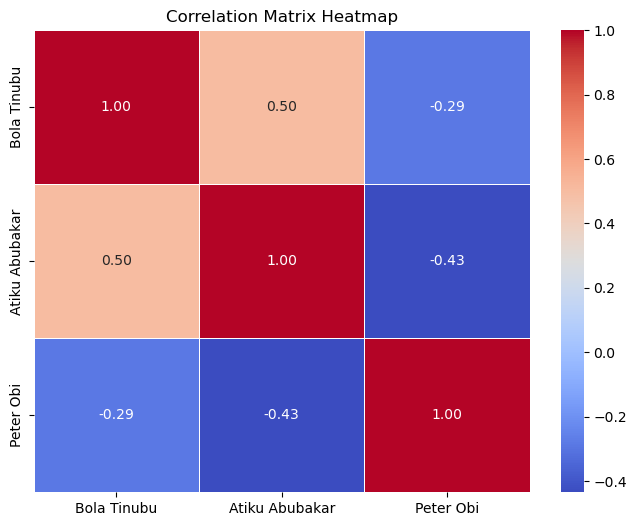

In [29]:
candidates = ['Bola Tinubu', 'Atiku Abubakar', 'Peter Obi']
votes_data = naija_results[candidates]

# Calculate the correlation matrix
correlation_matrix = votes_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Overall, these correlation coefficients suggest that there is a moderate positive relationship between the vote counts of Bola Tinubu and Atiku Abubakar, meaning that in some states, where Bola Tinubu received more votes, Atiku Abubakar also tended to receive more votes. On the other hand, there is a weak negative relationship between the vote counts of Bola Tinubu and Peter Obi, indicating that in some states where Bola Tinubu received more votes, Peter Obi tended to receive fewer votes, and vice versa. Similarly, there is a weak negative relationship between the vote counts of Atiku Abubakar and Peter Obi.